In [46]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [47]:
anovadf = pd.read_excel('wine_data_all.xlsx')
anovadf.head()

,Unnamed: 0,appellation,appellation_slug,classification,color,confidence_index,country,date,is_primeurs,journalist_count,lwin,lwin_11,regions,score,vintage,wine,wine_id,wine_slug,wine_type
0,0,Chianti Classico Gran Selezione,chianti-classico-gran-selezione,NaN,Red,A+,Italy,2019-06-15,False,5,NaN,NaN,['Tuscany'],93.59,2015,"Marchesi Antinori, Badia a Passignano, Chianti...",147377,marchesi-antinori-badia-a-passignano-chianti-c...,NaN
1,1,Chateauneuf Du Pape,chateauneuf-du-pape,NaN,Red,B+,France,2019-06-15,False,5,1113130.0,1.113130e+10,['Rhone'],90.68,2015,"E. Guigal, Chateauneuf Du Pape",68461,e-guigal-chateauneuf-du-pape,NaN
2,2,Saint Emilion Grand Cru,saint-emilion-grand-cru,NaN,Red,B+,France,2019-06-15,False,9,NaN,NaN,['Bordeaux'],89.85,2016,"Chateau Montlabert, Saint Emilion Grand Cru",39471,chateau-montlabert-saint-emilion-grand-cru,NaN
3,3,Haut Medoc,haut-medoc,Cru Bourgeois,Red,B,France,2019-06-15,False,7,NaN,NaN,['Bordeaux'],89.09,2016,"Chateau Larose Trintaudon, Haut Medoc",38120,chateau-larose-trintaudon-haut-medoc,NaN
4,4,Puisseguin Saint Emilion,puisseguin-saint-emilion,NaN,Red,C+,France,2019-06-15,False,3,NaN,NaN,['Bordeaux'],88.52,2016,"Vignobles Lannoye, Chateau Lanbersac, Puissegu...",140096,vignobles-lannoye-chateau-lanbersac-puisseguin...,NaN


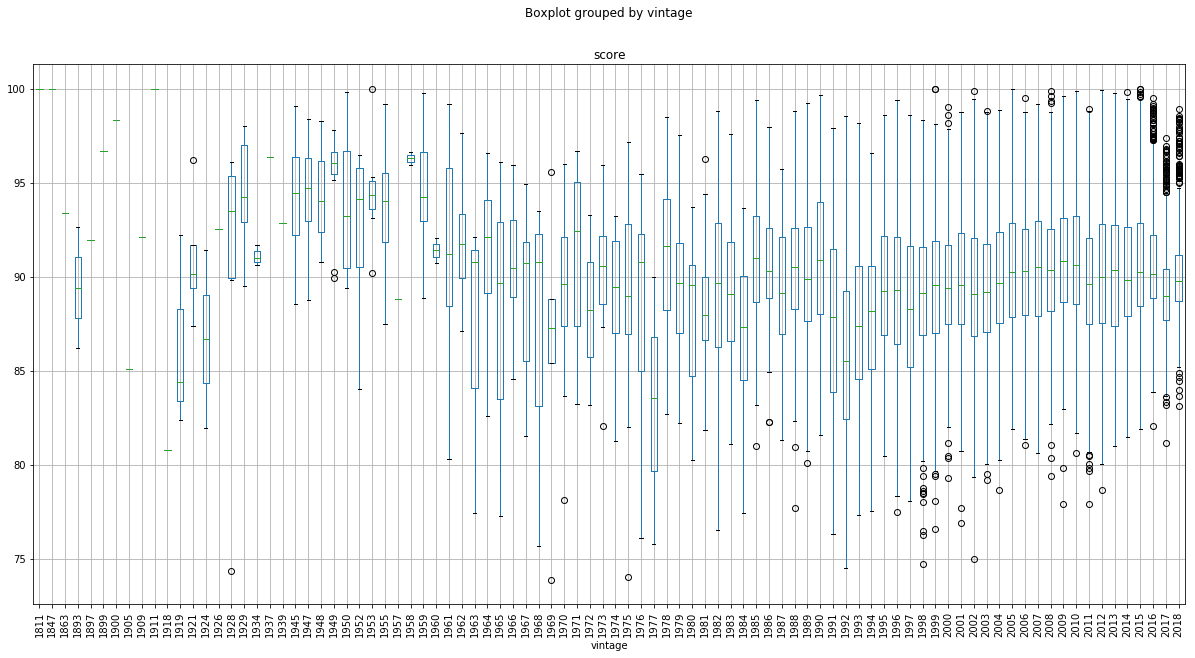

In [48]:
# Create a boxplot to compare means
anovadf.boxplot("score", by="vintage", figsize=(20, 10))
plt.xticks(rotation = 90);

In [57]:
vintages = anovadf.vintage.unique()
print(vintages)


[2015 2016 2017 1970 2018 2010 2013 2005 1995 1996 1998 2003 2004 2002
 2007 1994 1999 1997 1962 1990 1978 1971 1961 2000 2008 2011 2012 1985
 2014 1969 1988 2009 2001 1982 1983 1989 1964 1967 2006 1948 1968 1966
 1984 1986 1993 1928 1926 1953 1945 1975 1979 1919 1918 1965 1947 1959
 1929 1981 1987 1949 1955 1952 1992 1976 1991 1980 1934 1905 1973 1974
 1924 1957 1950 1977 1921 1937 1893 1958 1900 1939 1911 1960 1972 1963
 1863 1897 1909 1899 1811 1847]


In [53]:
groups = []
for vintage in vintages:
    tempgroup = anovadf[anovadf["vintage"] == vintage]["score"]
    groups.append(tempgroup) 

[0        93.59
1        90.68
16       93.14
37       99.38
39       96.37
52       91.47
904      90.33
906      88.53
912      89.92
974      97.45
989      96.78
994      96.15
1011     95.09
1025     94.02
1026     93.98
1037     93.61
1100     91.43
1149     89.86
1177     95.73
1229     94.84
1300     96.26
1310     97.77
1314     96.41
1315     96.03
1316     95.85
1325     94.48
1330     94.05
1334     93.72
1336     93.52
1342     92.85
         ...  
15935    90.42
15936    89.98
15937    89.81
15938    89.51
15939    89.46
15940    89.31
15941    88.76
15942    88.62
15943    88.39
15944    88.28
15945    88.26
15946    88.21
15947    88.20
15948    88.19
15949    88.06
15950    87.79
15951    87.43
15952    87.15
15953    86.81
15954    86.75
15955    86.55
15956    86.09
15962    90.71
15966    88.55
15968    87.98
15969    87.96
15970    90.53
15975    89.06
16031    91.47
16456    91.58
Name: score, Length: 2038, dtype: float64, 2        89.85
3        89.09
4        88

In [60]:
anova = stats.f_oneway(*[list(anovadf[anovadf['vintage']==vintage].score) for vintage in vintages])
#stats.f_oneway(groups.values())
print(anova)

F_onewayResult(statistic=20.83320966179601, pvalue=2.6224155e-317)


In [109]:
means = []
x = groups[1].mean()

for group in groups:
    x = group.mean()
    means.append(x)
print(means)

[90.80524043179585, 90.74152158010244, 89.25618863049098, 89.47606060606063, 90.14962660443396, 91.05745888594153, 90.2521875000001, 90.47261771747803, 89.52025761124125, 89.16178846153845, 89.0599836867863, 89.38882658359313, 89.88193897637781, 89.43894278606975, 90.62903565640194, 87.85804347826085, 89.45844137931032, 88.27282809611827, 91.85799999999999, 90.99381132075472, 91.29538461538462, 91.35695652173914, 91.5590909090909, 89.66004889975547, 90.433897928994, 89.70809890109874, 90.20684111268264, 90.98305263157893, 90.30028690662499, 86.19200000000001, 90.29887096774196, 91.02028405797097, 89.83753031973534, 89.50551181102365, 89.39814814814815, 90.05241706161142, 91.64649999999999, 88.84909090909092, 90.32335227272722, 94.36333333333334, 87.072, 90.76208333333334, 87.07105263157894, 90.61936708860758, 87.5687142857143, 91.0425, 92.56, 94.57285714285715, 94.24000000000001, 89.54243902439023, 89.55379310344827, 86.33333333333333, 80.79, 87.68666666666667, 94.36692307692307, 94.42

In [115]:
s = pd.Series(means, index =vintages)
s = s.sort_values(ascending=False)
print(s)

1911    100.000000
1811    100.000000
1847     99.990000
1900     98.340000
1899     96.720000
1937     96.390000
1958     96.305000
1949     95.213636
1953     94.572857
1959     94.420476
1929     94.416667
1947     94.366923
1948     94.363333
1945     94.240000
1950     93.912500
1955     93.555455
1863     93.370000
1939     92.860000
1926     92.560000
1952     92.395000
1909     92.120000
1897     91.970000
1962     91.858000
1964     91.646500
1961     91.559091
1960     91.405000
1971     91.356957
1978     91.295385
1934     91.110000
2010     91.057459
           ...    
2002     89.438943
1893     89.430000
1983     89.398148
2003     89.388827
1987     89.271750
2017     89.256189
1996     89.161788
1998     89.059984
1976     88.880000
1967     88.849091
1974     88.832857
1957     88.830000
1981     88.515385
1997     88.272828
1972     88.260000
1980     88.055000
1994     87.858043
1991     87.733282
1965     87.686667
1993     87.568714
1968     87.072000
1984     87.